In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

In [2]:
train_data = pd.read_csv('data/HSP_descriptors_NO_ERRS_ZEROS.csv',index_col=0)
train_data

,al,CAS,smiles,ABC,ABCGG,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,δD,δP,δH
0,"1,1,1,2-Tetrachloroethane",b'630-20-6',ClCC(Cl)(Cl)Cl,4.012290,4.284816,5.818626,2.074313,4.148627,5.818626,0.969771,...,20.736383,28,3,24.0,22.0,4.312500,1.375000,18.0,4.4,4.2
1,"1,1,1-Trichloroethane",b'71-55-6',CC(Cl)(Cl)Cl,3.464102,3.464102,4.000000,2.000000,4.000000,4.000000,0.800000,...,16.491254,16,0,20.0,16.0,4.062500,1.000000,16.8,4.3,2.0
2,"1,1,1-Trifluoroethane",b'420-46-2',CC(F)(F)F,3.464102,3.464102,4.000000,2.000000,4.000000,4.000000,0.800000,...,10.502336,16,0,20.0,16.0,4.062500,1.000000,14.6,10.0,0.0
3,"1,1,2,2-Tetrabromoethane",b'79-27-6',BrC(Br)C(Br)Br,3.932653,4.244375,6.000000,2.000000,4.000000,6.000000,1.000000,...,42.711125,29,4,22.0,21.0,4.222222,1.444444,21.0,7.0,8.2
4,"1,1,2,2-Tetrachloroethane",b'79-34-5',ClC(Cl)C(Cl)Cl,3.932653,4.244375,6.000000,2.000000,4.000000,6.000000,1.000000,...,20.736383,29,4,22.0,21.0,4.222222,1.444444,18.8,5.1,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,Quinine,b'130-95-0',[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,18.958632,14.851657,32.595631,2.494948,4.989896,32.595631,1.358151,...,6.753829,1286,42,132.0,161.0,7.000000,5.333333,19.0,6.6,11.0
1188,Sulfur Dioxide,b'9/5/7446',O=S=O,1.414214,1.414214,2.828427,1.414214,2.828427,2.828427,0.942809,...,21.320633,4,0,6.0,4.0,2.250000,1.000000,15.8,8.4,10.0
1189,Thionyl Chloride,b'9/7/7719',O=S(Cl)Cl,2.449490,2.449490,3.464102,1.732051,3.464102,3.464102,0.866025,...,29.476173,9,0,12.0,9.0,3.111111,1.000000,16.9,6.4,6.1
1190,Triethylene Glycol Monooleyl Ether,b'5274-66-8',COCCOCCOCCO,7.071068,6.765664,13.191508,1.931852,3.863703,13.191508,1.199228,...,6.077958,220,8,38.0,36.0,4.250000,3.000000,16.0,3.1,8.4


In [3]:
HSPs = ['δD','δP','δH']
train_hsp = train_data[['smiles']+HSPs]
train_hsp['total'] = np.sqrt(train_hsp['δD']**2+train_hsp['δP']**2+train_hsp['δH']**2)
train_hsp

/tmp/ipykernel_12634/2629748510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_hsp['total'] = np.sqrt(train_hsp['δD']**2+train_hsp['δP']**2+train_hsp['δH']**2)


,smiles,δD,δP,δH,total
0,ClCC(Cl)(Cl)Cl,18.0,4.4,4.2,19.000000
1,CC(Cl)(Cl)Cl,16.8,4.3,2.0,17.456517
2,CC(F)(F)F,14.6,10.0,0.0,17.696327
3,BrC(Br)C(Br)Br,21.0,7.0,8.2,23.605931
4,ClC(Cl)C(Cl)Cl,18.8,5.1,5.3,20.187620
...,...,...,...,...,...
1187,[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,19.0,6.6,11.0,22.925095
1188,O=S=O,15.8,8.4,10.0,20.498780
1189,O=S(Cl)Cl,16.9,6.4,6.1,19.073018
1190,COCCOCCOCCO,16.0,3.1,8.4,18.334939


In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'Nimbus Roman'

sns.set_style('whitegrid')
sns.set_context("paper")

# Number of atoms and molecular weight

In [5]:
train_hsp['NumAtoms'] = train_hsp['smiles'].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
train_hsp['MolWeight'] = train_hsp['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
train_hsp

[12:07:57] WARNING: not removing hydrogen atom without neighbors
[12:07:57] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_12634/1006919885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_hsp['NumAtoms'] = train_hsp['smiles'].apply(lambda x: Chem.MolFromSmiles(x).GetNumAtoms())
[12:07:57] WARNING: not removing hydrogen atom without neighbors
[12:07:57] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_12634/1006919885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,smiles,δD,δP,δH,total,NumAtoms,MolWeight
0,ClCC(Cl)(Cl)Cl,18.0,4.4,4.2,19.000000,6,165.891061
1,CC(Cl)(Cl)Cl,16.8,4.3,2.0,17.456517,5,131.930033
2,CC(F)(F)F,14.6,10.0,0.0,17.696327,5,84.018685
3,BrC(Br)C(Br)Br,21.0,7.0,8.2,23.605931,6,341.688998
4,ClC(Cl)C(Cl)Cl,18.8,5.1,5.3,20.187620,6,165.891061
...,...,...,...,...,...,...,...
1187,[H][C@@]1([C@@H](C2=CC=NC3=CC=C(C=C23)OC)O)C[C...,19.0,6.6,11.0,22.925095,24,324.183778
1188,O=S=O,15.8,8.4,10.0,20.498780,3,63.961900
1189,O=S(Cl)Cl,16.9,6.4,6.1,19.073018,4,117.904691
1190,COCCOCCOCCO,16.0,3.1,8.4,18.334939,11,164.104859


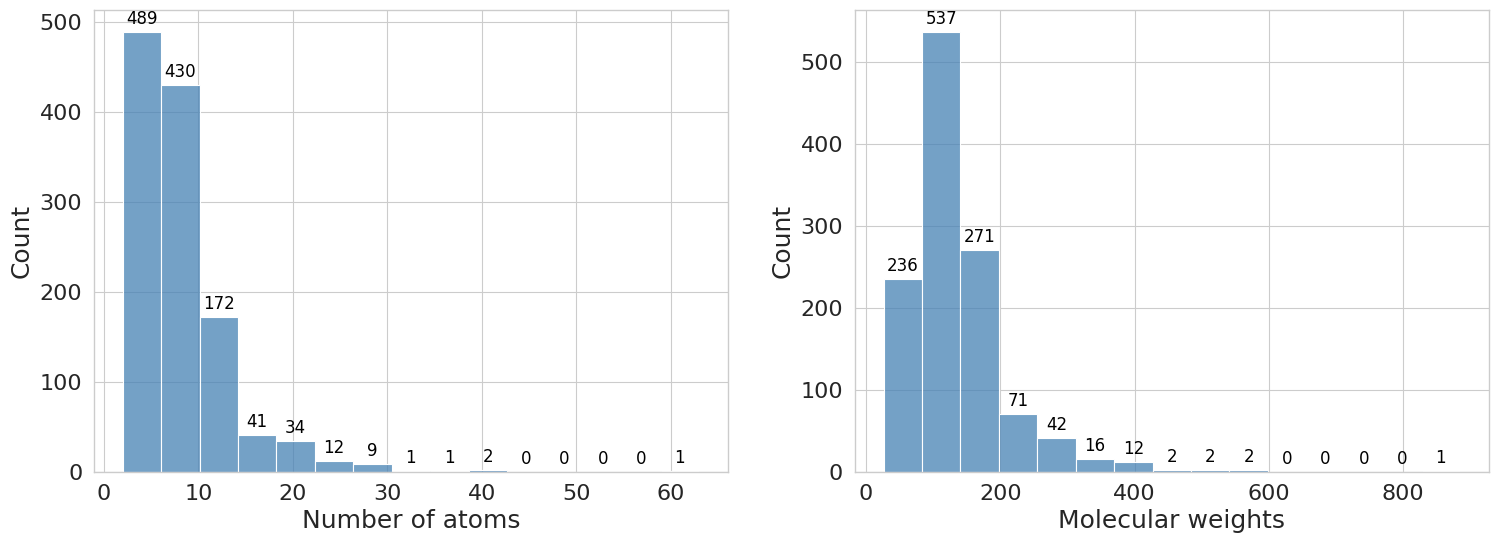

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
colors = ['steelblue', 'steelblue']

# Your histogram plotting code here...
num_atoms_hist = sns.histplot(train_hsp['NumAtoms'], ax=axs[0], bins=15, color=colors[0])
mol_weight_hist = sns.histplot(train_hsp['MolWeight'], ax=axs[1], bins=15, color=colors[1])

axs[0].set_xlabel(r'Number of atoms', fontsize=18)
axs[0].set_ylabel(r'Count', fontsize=18)
axs[1].set_xlabel(r'Molecular weights', fontsize=18)
axs[1].set_ylabel(r'Count', fontsize=18)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

# Annotate each bin with its count
for ax, hist_data in zip(axs, [num_atoms_hist, mol_weight_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')
fig.savefig('figs/Train_NA_MW.pdf',dpi=300)

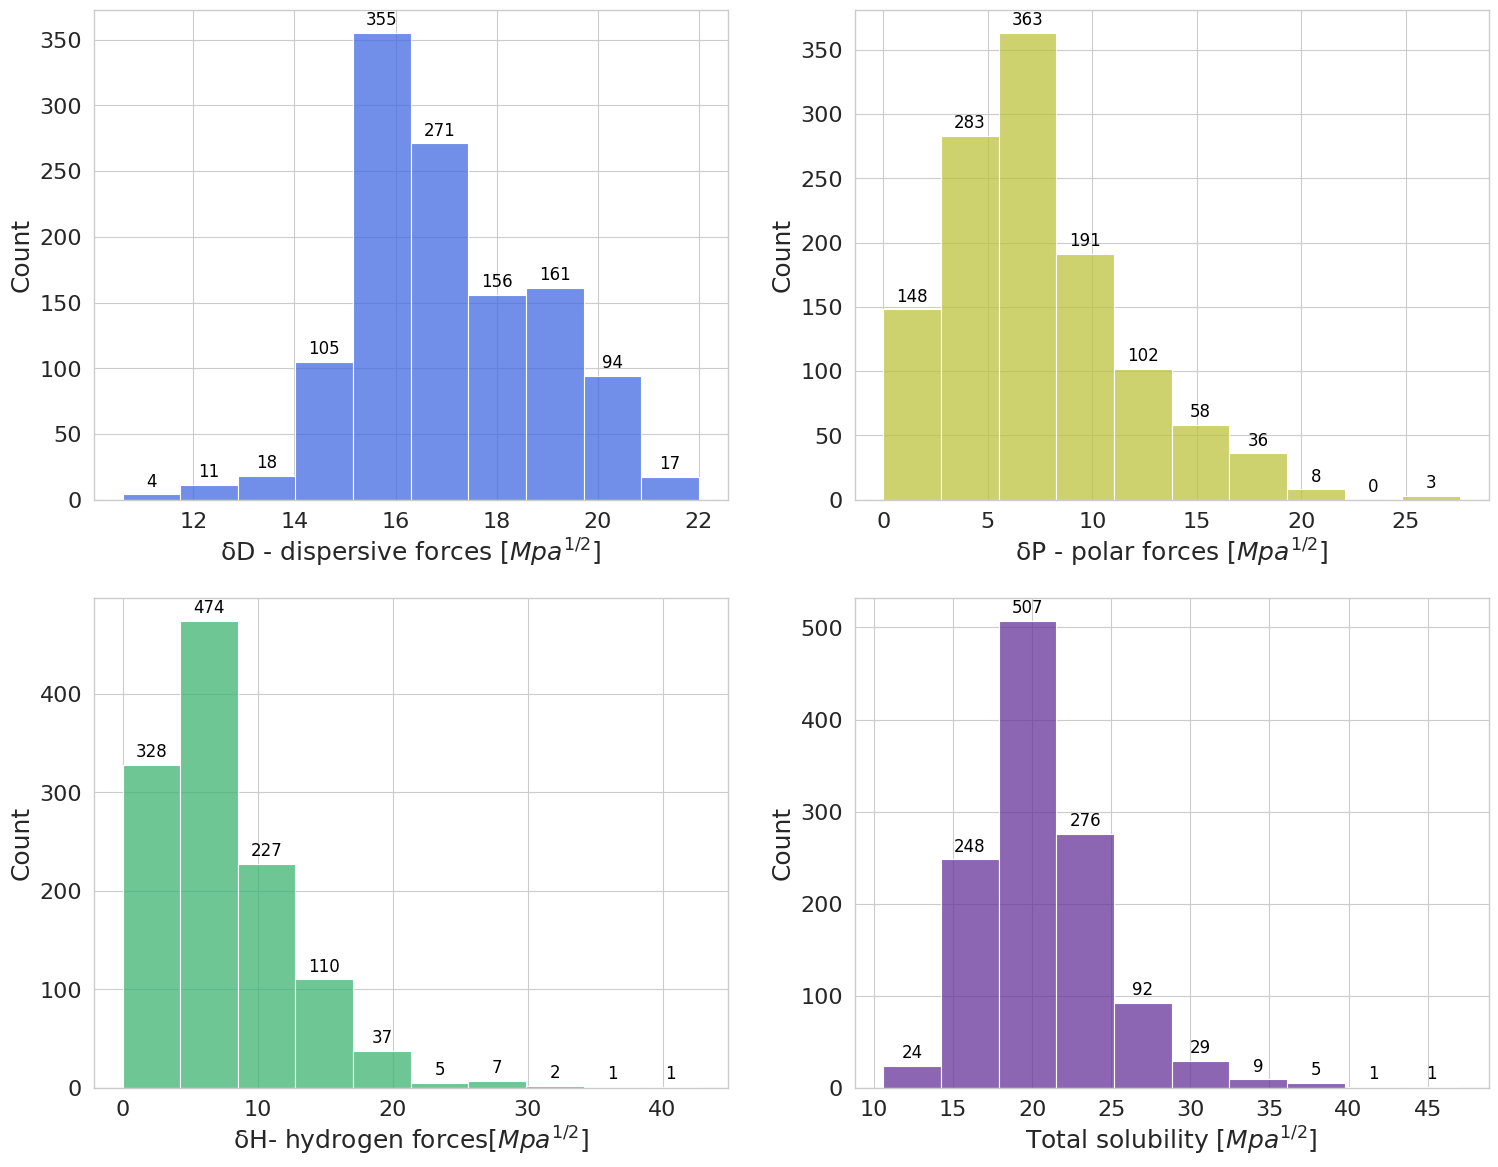

In [7]:
fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(train_hsp['δD'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(train_hsp['δP'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(train_hsp['δH'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(train_hsp['total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'δD - dispersive forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'δP - polar forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'δH- hydrogen forces[$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'Total solubility [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/Train_HSPT_histograms.pdf',dpi=300)

# Error analysis (validation sets)

We are using relative errors instead of absolute errors so that we circumvent the bigger differences that can occur for higher HSP values (i.e. the difference between true value that is 4 and predicted value which is 5 is more "problematic" than the difference between true value of 40 and predicted 41)

$$ relative\_error = 100\% * \frac{true-predicted}{true}$$

In [8]:
def get_hsp_errors(df,true_col=['D','P','H'],pred_col=['D predicted','P predicted','H predicted']):
    '''
    Calculates the relative error for each Hansen sol. parameter
    df = dataframe with predicted values and true values of HSP
    true_col = names of HSP columns
    pred_col = names of columns with predicted HSP values of the model
    '''
    for i,j in zip(true_col,pred_col):
        df[f'rel_err_{i}'] = 100*(np.abs((df[i]-df[j])/(df[i]+10e-4)))
    return df

def get_total_error(df,true='total',pred='PRED SOLUBILITY'):
    '''
    Calculates the relative error for total Hans sol. parameter
    '''
    df['rel_err_total'] = 100*((np.abs(df[true]-df[pred])/(df[true]+10e-4)))
    
    return df

## Data from 6

### GNNs


In [9]:
df = pd.read_csv('results/gnn/data_from_6_filtered_results.csv',index_col=0)
df

,Name,Smile,total,H,P,D,D predicted,P predicted,H predicted,PRED SOLUBILITY^2,PRED SOLUBILITY
0,3-METHYLPENTANE,CCC(C)CC,14.67,0.00,0.00,14.670000,14.505937,0.292951,0.986657,211.48150,14.542404
1,"2,4-DIMETHYLHEXANE",CCC(C)CC(C)C,14.65,0.00,0.00,14.650000,14.909762,0.591652,1.496118,224.88943,14.996314
2,benzene,C1=CC=CC=C1,18.41,2.05,1.02,18.267052,18.129904,0.516044,2.098541,333.36360,18.258247
3,toluene,CC1=CC=CC=C1,18.32,2.00,1.40,18.156608,18.231936,1.151522,2.567746,340.32278,18.447840
4,STYRENE,C=CC1=CC=CC=C1,19.07,4.10,1.00,18.597175,18.532015,2.176307,3.975624,363.97745,19.078194
5,O-XYLENE,CC1=CC=CC=C1C,18.20,3.10,1.00,17.906144,18.547657,1.212736,1.754281,348.56384,18.669865
6,tetralin,C1CCC2=CC=CC=C2C1,19.80,2.90,2.00,19.484096,19.045704,1.911807,1.399194,368.35156,19.192488
7,acetone,CC(=O)C,19.95,6.95,10.43,15.521440,15.231683,10.443392,6.901160,388.69460,19.715340
8,ACETOPHENONE,CC(=O)C1=CC=CC=C1,21.73,3.68,8.59,19.617910,19.232456,9.318963,3.854703,471.58917,21.716105
9,ETHYL ACETATE,CCOC(=O)C,18.48,9.20,5.85,14.921391,15.465157,4.943383,7.075350,313.66867,17.710693


In [10]:
get_hsp_errors(df)
get_total_error(df)

,Name,Smile,total,H,P,D,D predicted,P predicted,H predicted,PRED SOLUBILITY^2,PRED SOLUBILITY,rel_err_D,rel_err_P,rel_err_H,rel_err_total
0,3-METHYLPENTANE,CCC(C)CC,14.67,0.00,0.00,14.670000,14.505937,0.292951,0.986657,211.48150,14.542404,1.118281,29295.063000,98665.680000,0.869716
1,"2,4-DIMETHYLHEXANE",CCC(C)CC(C)C,14.65,0.00,0.00,14.650000,14.909762,0.591652,1.496118,224.88943,14.996314,1.772998,59165.180000,149611.810000,2.363757
2,benzene,C1=CC=CC=C1,18.41,2.05,1.02,18.267052,18.129904,0.516044,2.098541,333.36360,18.258247,0.750755,49.359046,2.366689,0.824252
3,toluene,CC1=CC=CC=C1,18.32,2.00,1.40,18.156608,18.231936,1.151522,2.567746,340.32278,18.447840,0.414859,17.735789,28.373113,0.697779
4,STYRENE,C=CC1=CC=CC=C1,19.07,4.10,1.00,18.597175,18.532015,2.176307,3.975624,363.97745,19.078194,0.350354,117.513157,3.032831,0.042966
5,O-XYLENE,CC1=CC=CC=C1C,18.20,3.10,1.00,17.906144,18.547657,1.212736,1.754281,348.56384,18.669865,3.582441,21.252388,43.396282,2.581534
6,tetralin,C1CCC2=CC=CC=C2C1,19.80,2.90,2.00,19.484096,19.045704,1.911807,1.399194,368.35156,19.192488,2.249884,4.407441,51.734105,3.068087
7,acetone,CC(=O)C,19.95,6.95,10.43,15.521440,15.231683,10.443392,6.901160,388.69460,19.715340,1.866698,0.128387,0.702633,1.176182
8,ACETOPHENONE,CC(=O)C1=CC=CC=C1,21.73,3.68,8.59,19.617910,19.232456,9.318963,3.854703,471.58917,21.716105,1.964707,8.485194,4.746066,0.063941
9,ETHYL ACETATE,CCOC(=O)C,18.48,9.20,5.85,14.921391,15.465157,4.943383,7.075350,313.66867,17.710693,3.643962,15.495083,23.091512,4.162691


In [11]:
df['rel_err_total'].sort_values(ascending=True)

4      0.042966
16     0.059125
8      0.063941
22     0.070752
3      0.697779
13     0.751507
2      0.824252
0      0.869716
29     0.875295
18     1.009691
11     1.052547
19     1.126310
7      1.176182
23     1.206435
21     1.252217
20     1.671214
1      2.363757
26     2.380174
10     2.513206
5      2.581534
6      3.068087
15     3.139688
17     3.304502
27     3.390458
9      4.162691
25     4.588617
14     5.138993
30     9.907610
24    16.206630
28    17.353811
12    21.108324
Name: rel_err_total, dtype: float64

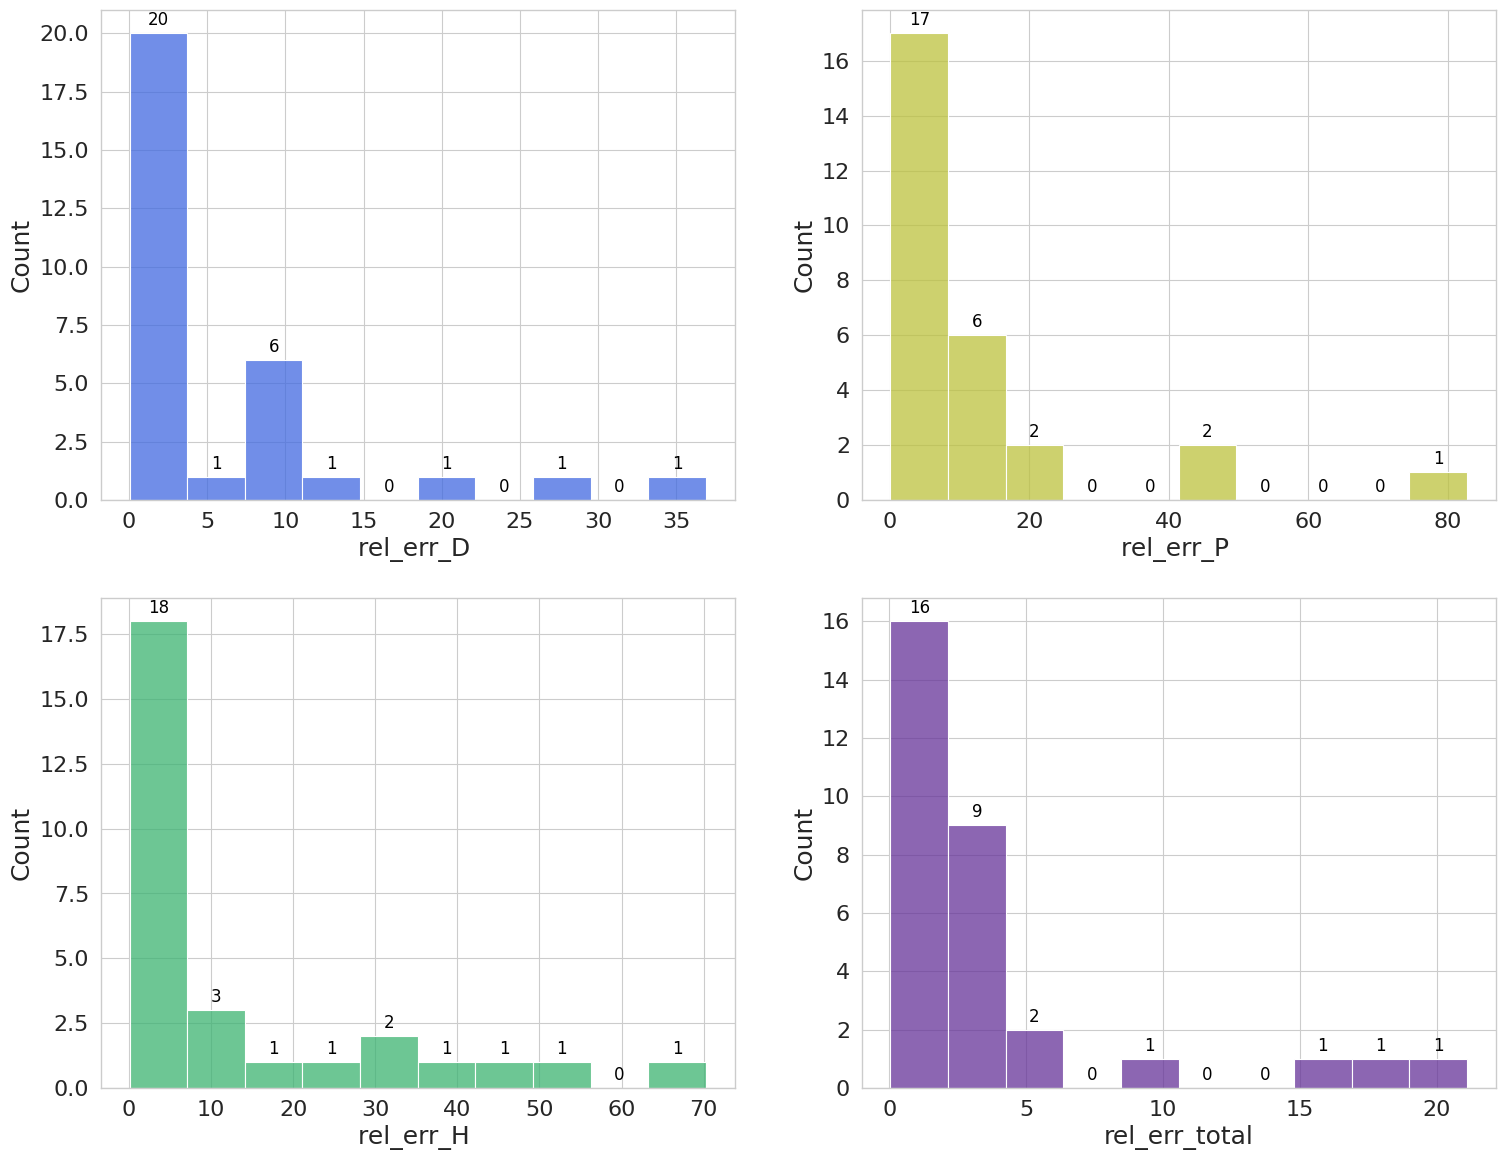

In [12]:
fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(df[df['rel_err_D']<100]['rel_err_D'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(df[df['rel_err_P']<100]['rel_err_P'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(df[df['rel_err_H']<100]['rel_err_H'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(df[df['rel_err_total']<100]['rel_err_total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'rel_err_D ', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'rel_err_P ', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'rel_err_H ', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'rel_err_total', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/data_from_6_rell_err_hists_GNN.pdf',dpi=300)

In [13]:
gnn_errs = df[['rel_err_D','rel_err_D','rel_err_D','rel_err_total']]

### XGBOOST

10 features

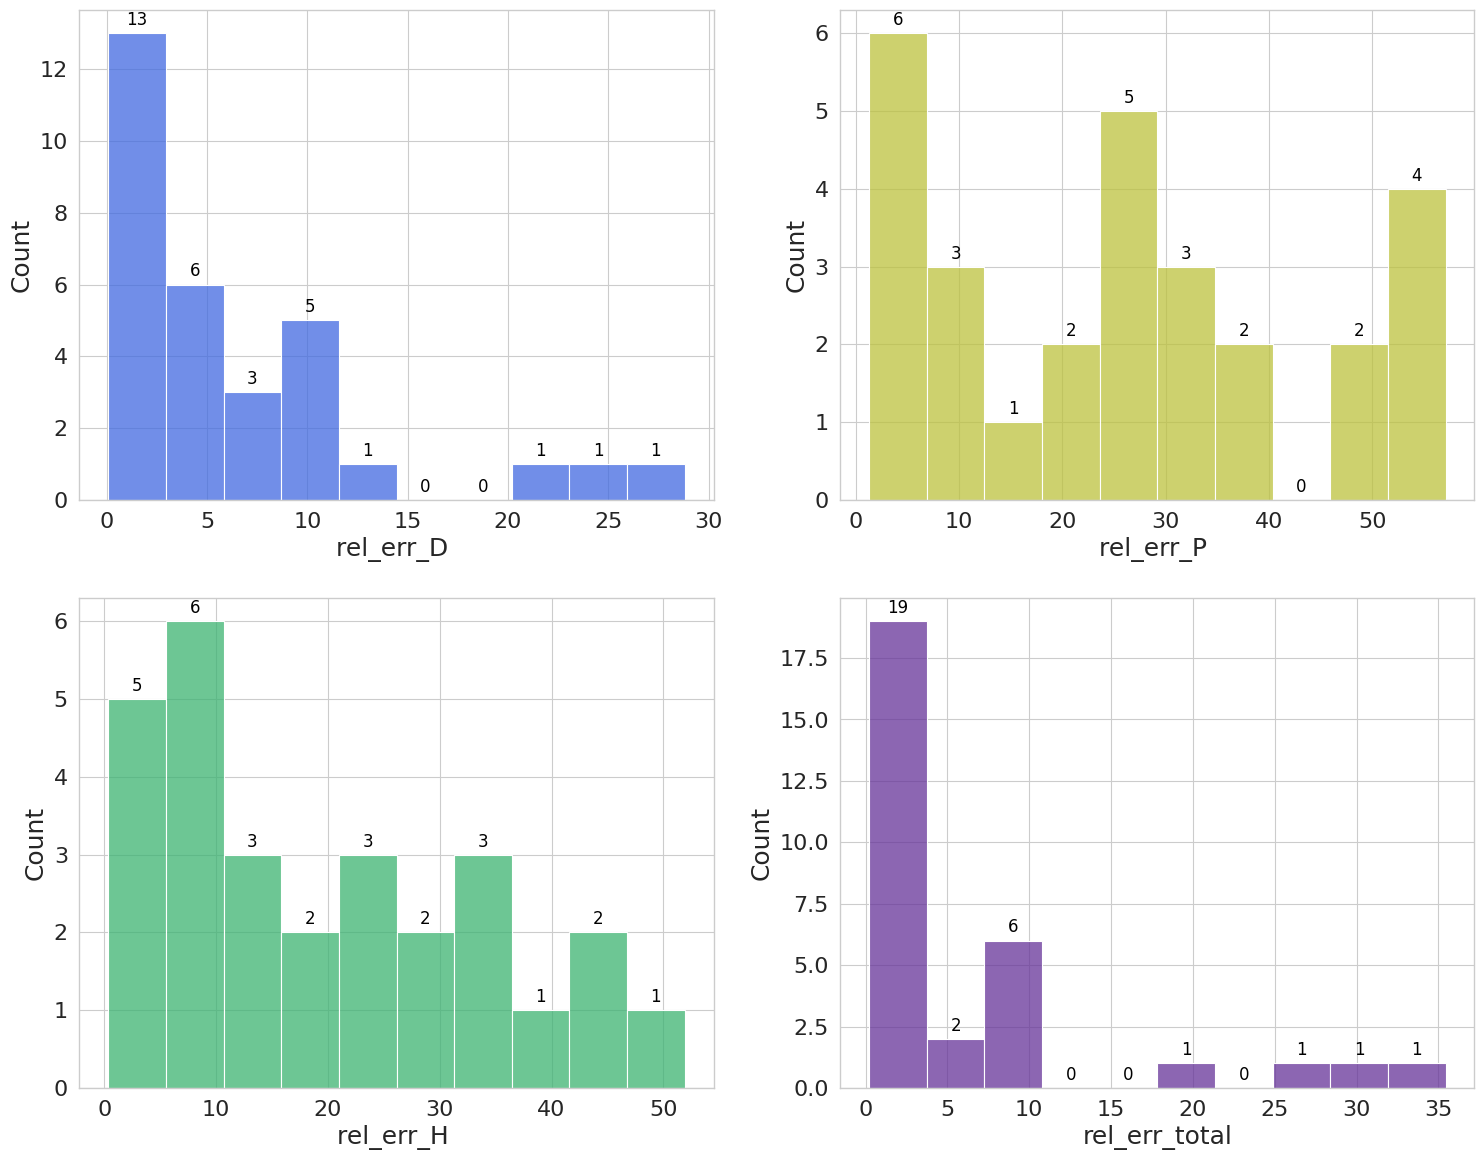

In [14]:
df = pd.read_csv('results/xgboost/10/data_from_6_filtered_results.csv',index_col=0)
df.reset_index(inplace=True,drop=True) # i forgot to reset it previously
get_hsp_errors(df)
get_total_error(df,pred='PREDICTED SOL')

fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(df[df['rel_err_D']<100]['rel_err_D'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(df[df['rel_err_P']<100]['rel_err_P'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(df[df['rel_err_H']<100]['rel_err_H'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(df[df['rel_err_total']<100]['rel_err_total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'rel_err_D ', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'rel_err_P ', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'rel_err_H ', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'rel_err_total', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/data_from_6_rell_err_hists_XGBOOST10.pdf',dpi=300)



In [15]:
xgb10_errs = df[['rel_err_D','rel_err_D','rel_err_D','rel_err_total']]

30 features

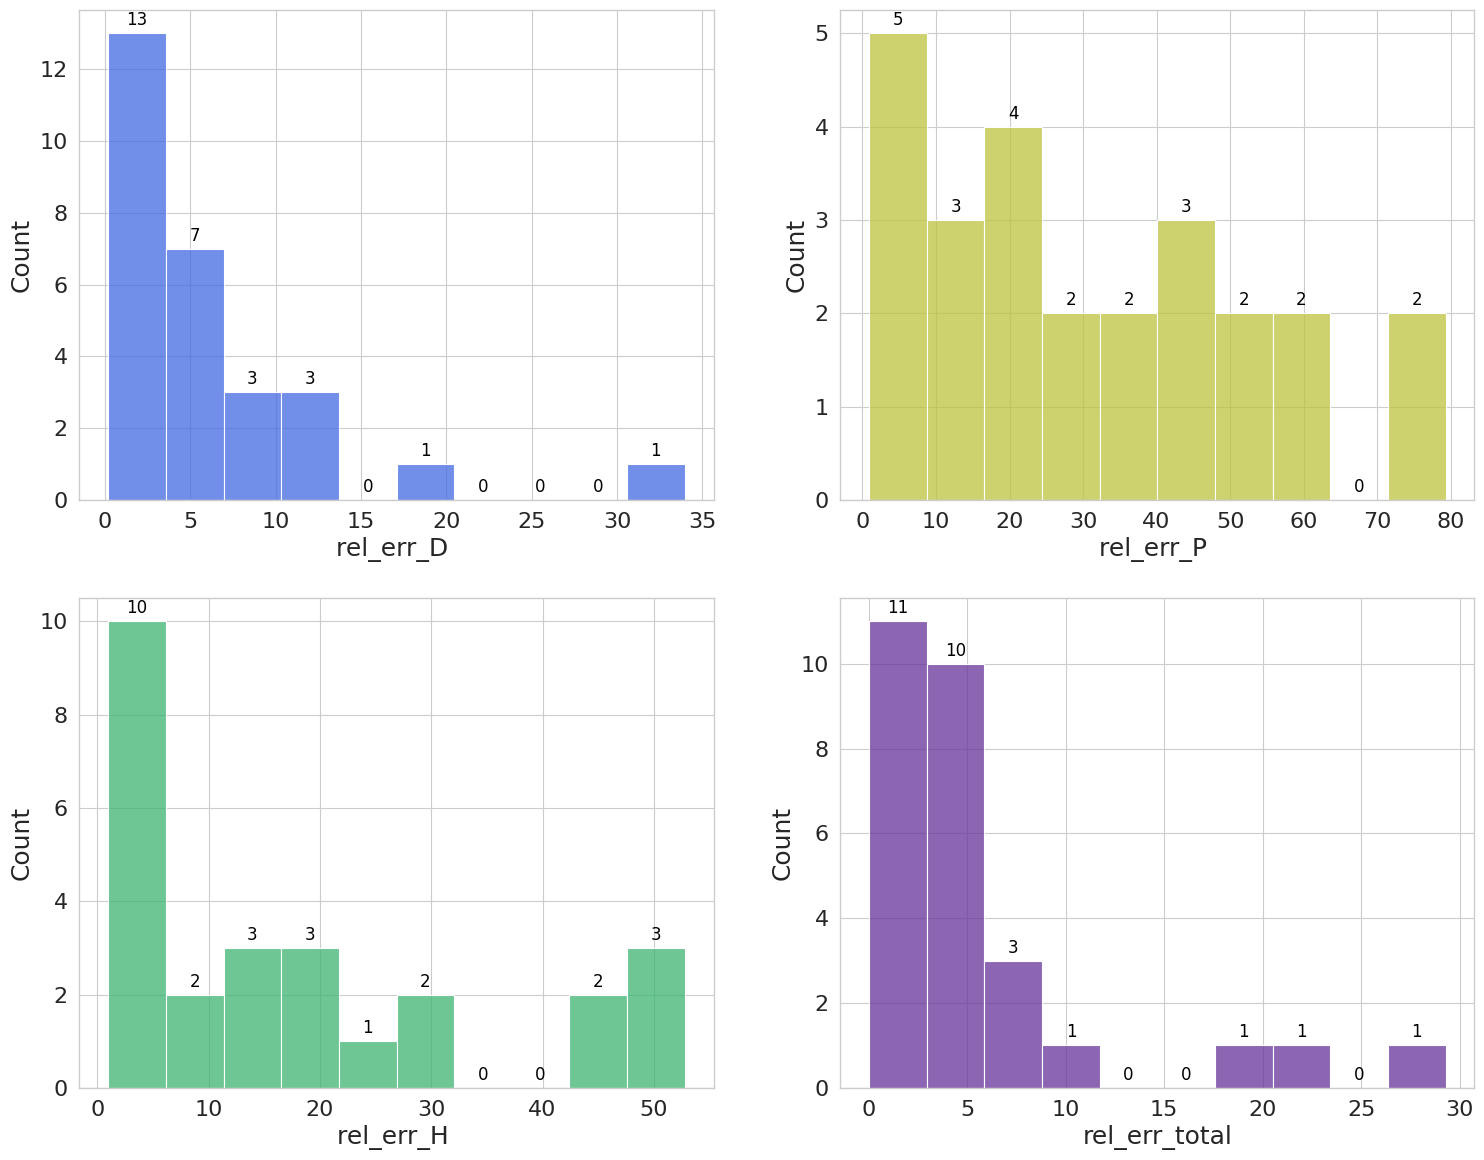

In [16]:
df = pd.read_csv('results/xgboost/30/data_from_6_filtered_results.csv',index_col=0)
df.reset_index(inplace=True,drop=True) # i forgot to reset it previously
get_hsp_errors(df)
get_total_error(df,pred='PREDICTED SOL')

fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(df[df['rel_err_D']<100]['rel_err_D'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(df[df['rel_err_P']<100]['rel_err_P'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(df[df['rel_err_H']<100]['rel_err_H'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(df[df['rel_err_total']<100]['rel_err_total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'rel_err_D ', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'rel_err_P ', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'rel_err_H ', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'rel_err_total', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/data_from_6_rell_err_hists_XGBOOST30.pdf',dpi=300)



In [17]:
xgb30_errs = df[['rel_err_D','rel_err_D','rel_err_D','rel_err_total']]

50 features

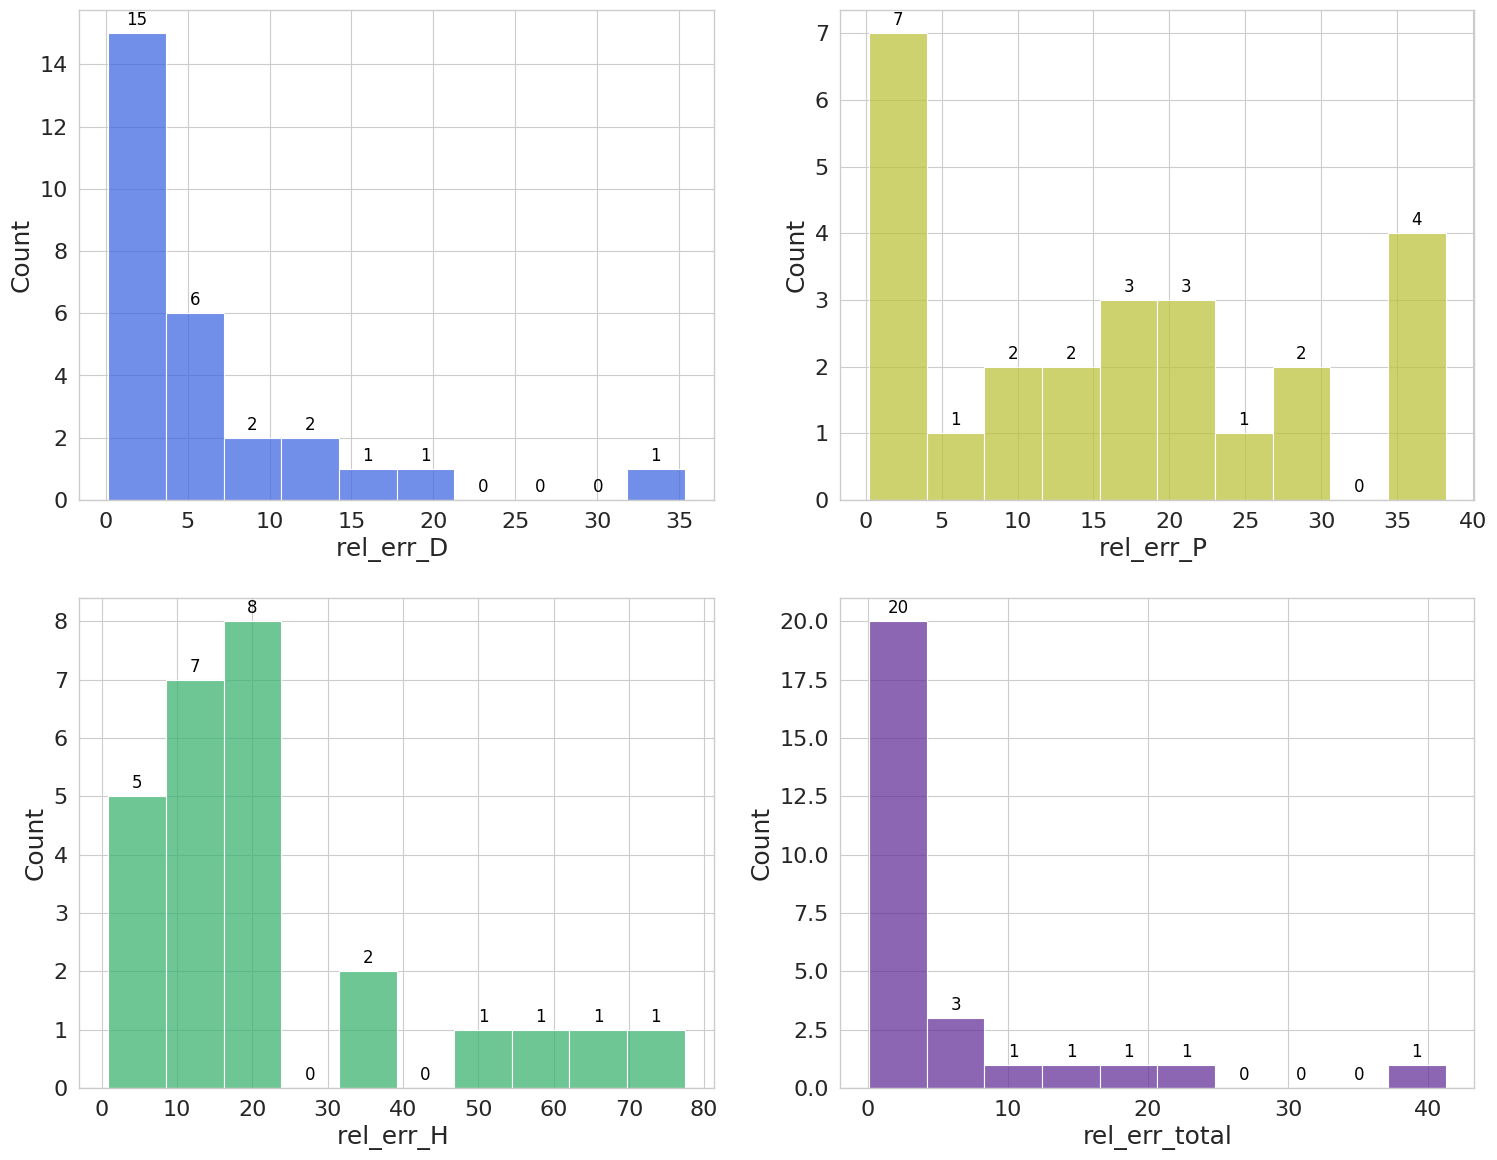

In [18]:
df = pd.read_csv('results/xgboost/50/data_from_6_filtered_results.csv',index_col=0)
df.reset_index(inplace=True,drop=True) # i forgot to reset it previously
get_hsp_errors(df)
get_total_error(df,pred='PREDICTED SOL')

fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(df[df['rel_err_D']<100]['rel_err_D'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(df[df['rel_err_P']<100]['rel_err_P'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(df[df['rel_err_H']<100]['rel_err_H'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(df[df['rel_err_total']<100]['rel_err_total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'rel_err_D ', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'rel_err_P ', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'rel_err_H ', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Count', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'rel_err_total', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Count', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its count
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/data_from_6_rell_err_hists_XGBOOST50.pdf',dpi=300)



In [19]:
xgb50_errs = df[['rel_err_D','rel_err_D','rel_err_D','rel_err_total']]

## Violin plots (GNN vs XGBOOST)

In [20]:
bdf = pd.DataFrame()
bdf['GNN'] = gnn_errs['rel_err_total']
bdf['XGBOOST10'] = xgb10_errs['rel_err_total']
bdf['XGBOOST30'] = xgb30_errs['rel_err_total']
bdf['XGBOOST50'] = xgb50_errs['rel_err_total']
bdf

,GNN,XGBOOST10,XGBOOST30,XGBOOST50
0,0.869716,0.432738,5.862300,2.066553
1,2.363757,3.185619,5.587448,1.501433
2,0.824252,1.835017,1.245332,1.274130
3,0.697779,1.797025,0.483260,0.440009
4,0.042966,1.431414,1.283179,0.491353
5,2.581534,0.671655,0.023944,0.106824
6,3.068087,2.700086,4.193374,3.713201
7,1.176182,0.223904,0.782813,1.936925
8,0.063941,2.113281,3.265763,2.066702
9,4.162691,0.424544,0.120096,1.500741


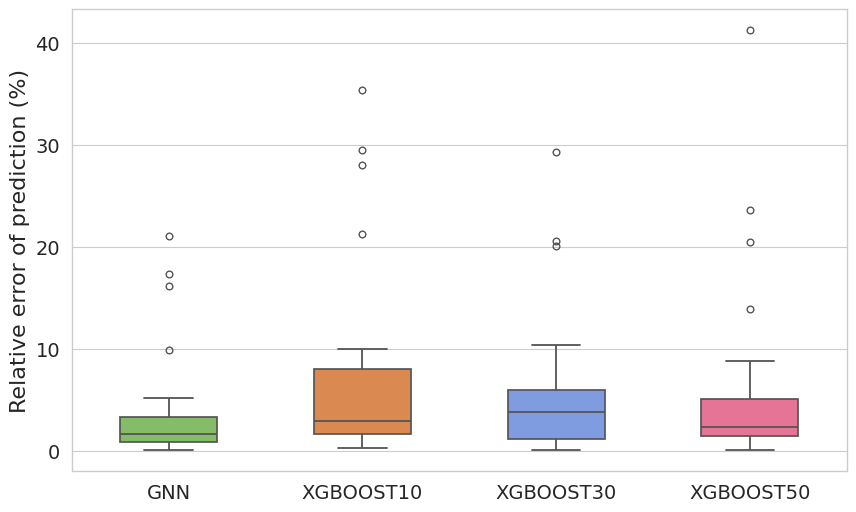

In [21]:

fig,axs = plt.subplots(figsize=(10,6))
colors = ['#78C850', '#F08030', '#6890F0','#F85888']
sns.boxplot(bdf,width=0.5,palette=colors,linewidth=1.3, boxprops=dict(alpha=0.95))
axs.set_ylabel('Relative error of prediction (%)',fontsize=16)
axs.tick_params(axis='both', which='major',labelsize=14)

## Data from 42

## Solvents